In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
df = pd.read_csv("C:/Users/PARTH/Downloads/anikat/archive heart health/heart.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [3]:
df.shape

(1025, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# EDA

## Basic Questions

#### What is the average age of patients in the dataset?

In [14]:
avg_age = df['age'].mean()
print(avg_age)

54.43414634146342


#### What is the gender distribution of patients?

In [15]:
d_g = df['sex'].value_counts()
print(d_g)

sex
1    713
0    312
Name: count, dtype: int64


#### What is the average resting blood pressure of patients?

In [17]:
resting_blood_pressure=df['trestbps'].mean()
print(resting_blood_pressure)

131.61170731707318


#### How many patients have fasting blood sugar levels higher than 120 mg/dl?

In [19]:
p = df['fbs'].sum()
print(p)

153


#### What are the different types of chest pain recorded in the dataset?

In [21]:
 print(df['cp'].unique())

[0 1 2 3]


#### What is the maximum heart rate achieved by patients?

In [22]:
print(df['thalach'].max())

202


#### What percentage of patients experience exercise-induced angina?

In [25]:
print(df['exang'].mean() * 100)

33.65853658536586


#### What is the average cholesterol level in the dataset?

In [27]:
print(df['chol'].mean())

246.0


#### How many patients have a resting electrocardiographic result of 2?

In [28]:
df['ca'].value_counts()

ca
0    578
1    226
2    134
3     69
4     18
Name: count, dtype: int64

### Medium-Level Questions

#### What is the correlation between age and cholesterol levels?

In [29]:
df[['age', 'chol']].corr()

,age,chol
age,1.000000,0.219823
chol,0.219823,1.000000


#### What is the distribution of chest pain types across different age groups?

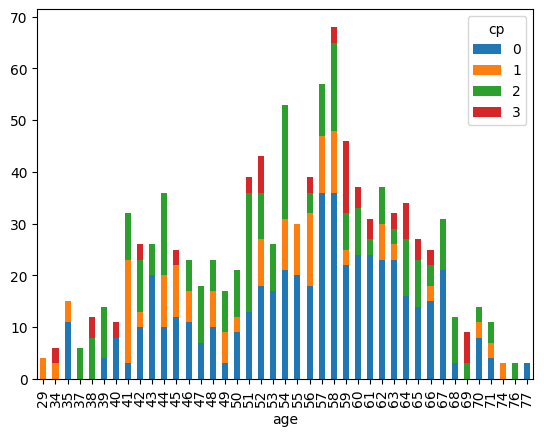

In [32]:
df.groupby('age')['cp'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()

#### How does maximum heart rate vary with exercise-induced angina?

In [33]:
df.groupby('exang')['thalach'].mean()

exang
0    155.342647
1    136.837681
Name: thalach, dtype: float64

#### Is there a significant difference in resting blood pressure between male and female patients?

In [35]:
df.groupby('sex')['trestbps'].mean()

sex
0    133.701923
1    130.697055
Name: trestbps, dtype: float64

#### What is the relationship between fasting blood sugar levels and the presence of heart disease?

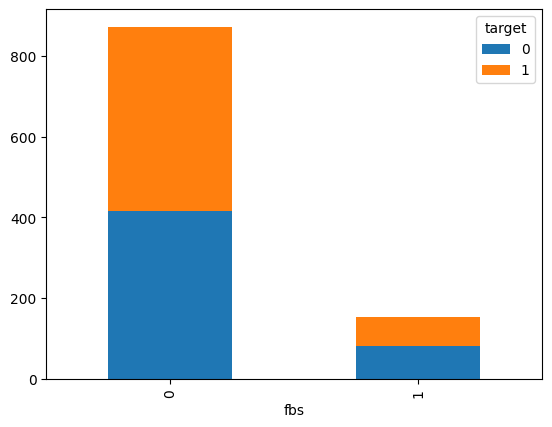

In [38]:
pd.crosstab(df['fbs'], df['target']).plot(kind='bar', stacked=True)
plt.show()

#### How does the number of major vessels (ca) affect the target variable (heart disease presence)?

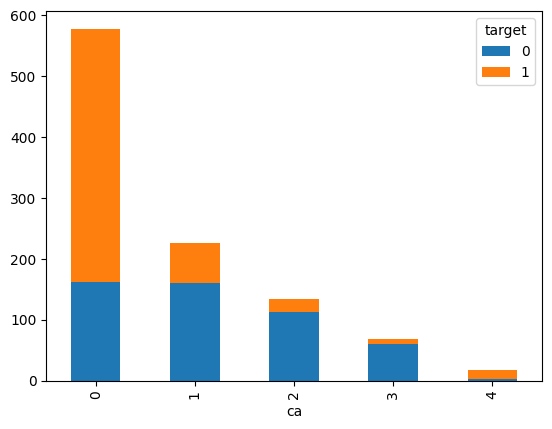

In [40]:
pd.crosstab(df['ca'], df['target']).plot(kind='bar', stacked=True)
plt.show()

#### What is the average oldpeak value for patients with different types of chest pain?

In [41]:
df.groupby('cp')['oldpeak'].mean()

cp
0    1.438833
1    0.323952
2    0.784507
3    1.380519
Name: oldpeak, dtype: float64

#### Analyze the distribution of thalassemia types (thal) among patients with heart disease.

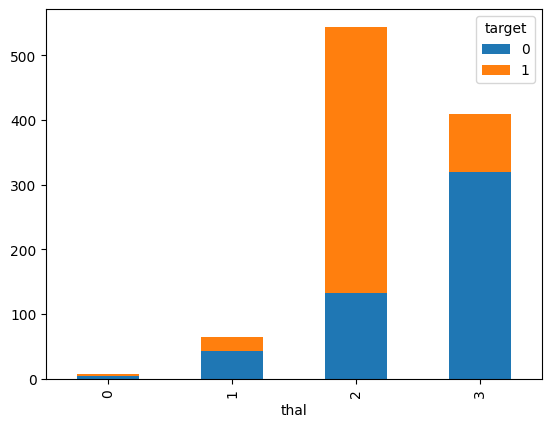

In [44]:
pd.crosstab(df['thal'], df['target']).plot(kind='bar', stacked=True)
plt.show()

#### What are the most common combinations of risk factors in patients with heart disease?

In [45]:
df[df['target'] == 1].groupby(['cp', 'fbs', 'exang', 'thal']).size().reset_index(name='counts').sort_values(by='counts', ascending=False)

,cp,fbs,exang,thal,counts
15,2,0,0,2,133
8,1,0,0,2,97
1,0,0,0,2,73
19,2,1,0,2,32
16,2,0,0,3,19
4,0,0,1,2,18
23,3,0,0,2,16
9,1,0,0,3,15
17,2,0,1,2,13
24,3,0,0,3,10


#### Perform a pairwise comparison of clinical measurements for patients with and without heart disease.

In [47]:
print(df[df['target'] == 1].describe())
print(df[df['target'] == 0].describe())

              age         sex          cp    trestbps        chol         fbs  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean    52.408745    0.570342    1.378327  129.245247  240.979087    0.134981   
std      9.631804    0.495498    0.945881   16.112188   53.010345    0.342029   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     44.000000    0.000000    1.000000  120.000000  208.000000    0.000000   
50%     52.000000    1.000000    2.000000  130.000000  234.000000    0.000000   
75%     59.000000    1.000000    2.000000  140.000000  265.750000    0.000000   
max     76.000000    1.000000    3.000000  180.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  526.000000  526.000000  526.000000  526.000000  526.000000  526.000000   
mean     0.598859  158.585551    0.134981    0.569962    1.593156    0.370722   
std      0.502109   19.0969

### Advanced-Level Questions

#### What is the effect of combining multiple risk factors (age, cholesterol, blood pressure) on the likelihood of heart disease?

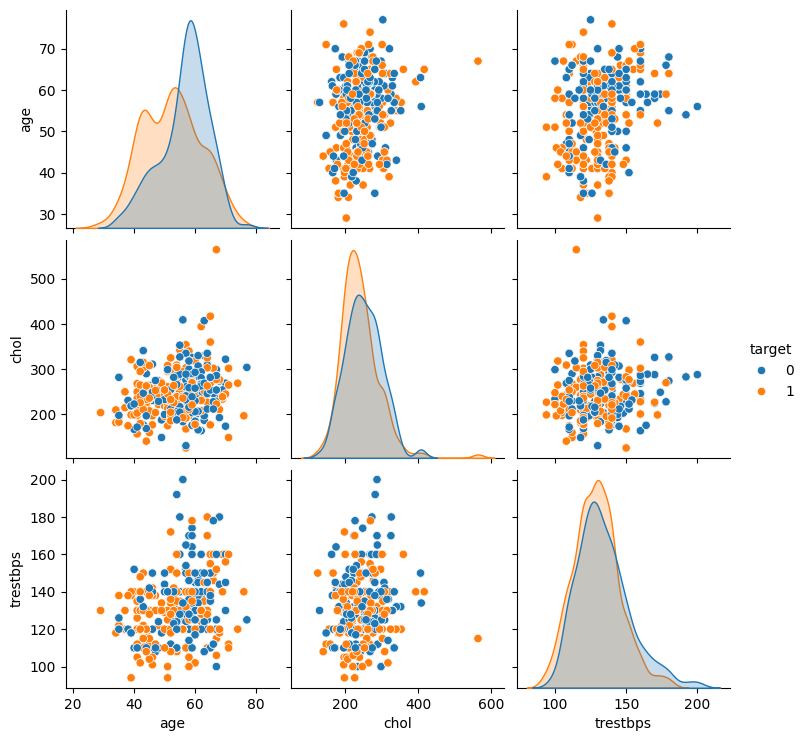

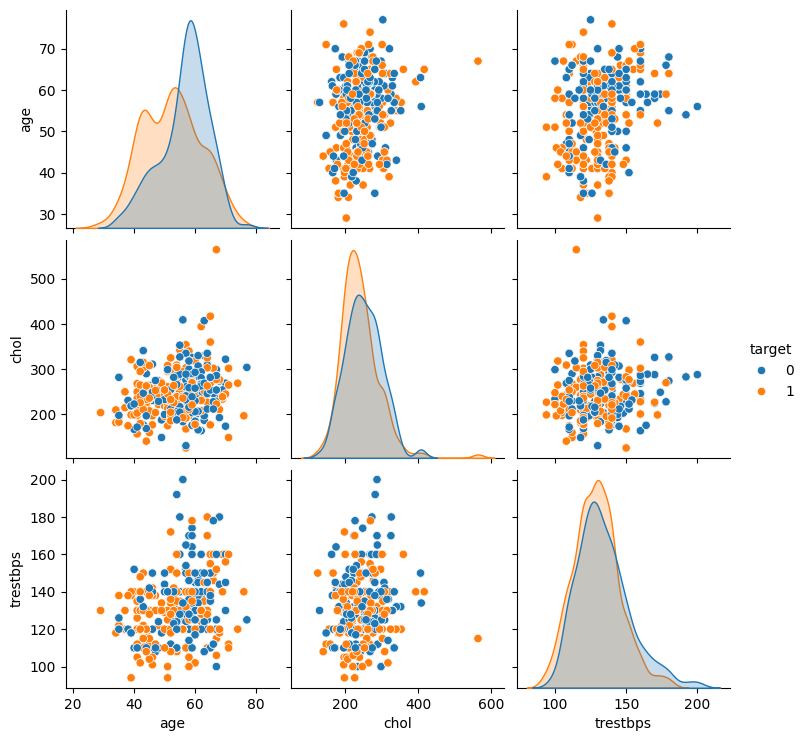

In [50]:
sns.pairplot(df, hue='target', vars=['age', 'chol', 'trestbps'])
plt.show()

#### Which clinical measurement has the strongest correlation with heart disease presence?

In [51]:
df.corr()['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

#### How do the values of the slope of the peak exercise ST segment (slope) vary with different chest pain types?

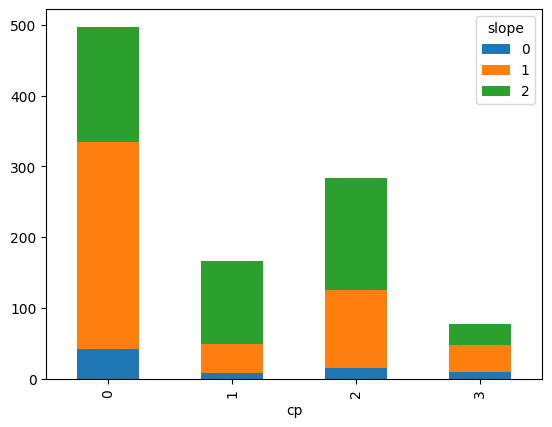

In [52]:
df.groupby('cp')['slope'].value_counts().unstack().plot(kind='bar', stacked=True)
plt.show()

#### Analyze the survival rates of patients with different thalassemia types over a period.

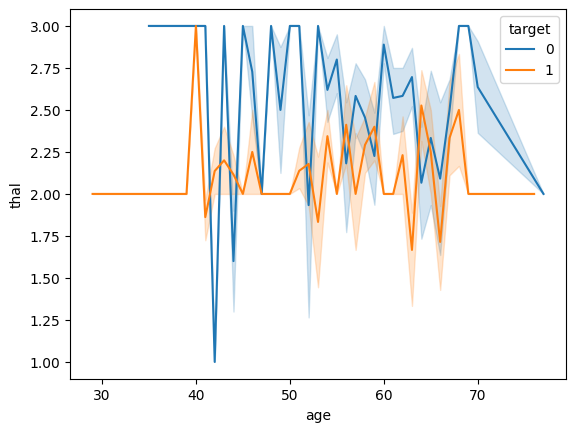

In [53]:
sns.lineplot(x='age', y='thal', hue='target', data=df)
plt.show()